1. Mean Squared Error

In [ ]:
def mean_squared_error(predicted, actual):
    if len(predicted) != len(actual):
        raise ValueError("The length of predicted and actual lists must be the same.")

    mse = sum((p - a) ** 2 for p, a in zip(predicted, actual)) / len(predicted)
    return mse

# Example usage:
predicted_values = [3, -0.5, 2, 7]
actual_values = [2.5, 0.0, 2, 8]

mse = mean_squared_error(predicted_values, actual_values)
print("Mean Squared Error:", mse)

2. Gaussian Mixture Model (GMM)

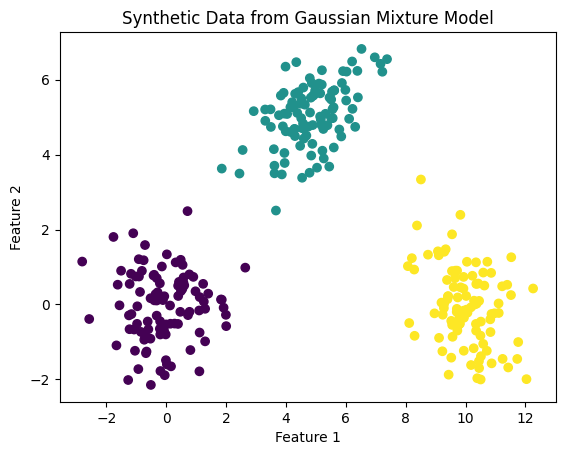

In [1]:
import numpy as np

def generate_gmm_data(num_clusters, points_per_cluster, means, covariances):
    """
    Generate synthetic data using Gaussian Mixture Model (GMM).

    Parameters:
    - num_clusters: Number of clusters (Gaussian distributions).
    - points_per_cluster: Number of points to generate per cluster.
    - means: A list of means for each cluster (shape: (num_clusters, n_features)).
    - covariances: A list of covariance matrices for each cluster
                    (shape: (num_clusters, n_features, n_features)).

    Returns:
    - data: A numpy array containing the generated data points.
    - labels: A list of cluster labels corresponding to each data point.
    """
    data = []
    labels = []

    for cluster in range(num_clusters):
        # Generate points from a multivariate Gaussian distribution
        points = np.random.multivariate_normal(means[cluster], covariances[cluster], points_per_cluster)
        data.append(points)
        labels.extend([cluster] * points_per_cluster)

    return np.vstack(data), np.array(labels)

# Example usage
num_clusters = 3
points_per_cluster = 100

# Define means and covariances for each cluster
means = [
    [0, 0],
    [5, 5],
    [10, 0]
]

covariances = [
    [[1, 0], [0, 1]],   # Covariance for cluster 1
    [[1, 0.5], [0.5, 1]],  # Covariance for cluster 2
    [[1, -0.5], [-0.5, 1]]  # Covariance for cluster 3
]

data, labels = generate_gmm_data(num_clusters, points_per_cluster, means, covariances)

# Example to visualize the generated data (optional)
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.title('Synthetic Data from Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

3. Batch normalization

In [2]:
import numpy as np

class BatchNorm:
    def __init__(self, num_features, momentum=0.9, epsilon=1e-5):
        self.num_features = num_features
        self.momentum = momentum
        self.epsilon = epsilon

        # Initialize parameters
        self.gamma = np.ones(num_features)  # Scale factor
        self.beta = np.zeros(num_features)  # Shift factor

        # Running estimates
        self.running_mean = np.zeros(num_features)
        self.running_var = np.ones(num_features)

    def forward(self, x, training=True):
        if training:
            # Calculate mean and variance
            batch_mean = np.mean(x, axis=0)
            batch_var = np.var(x, axis=0)

            # Normalize the batch
            x_hat = (x - batch_mean) / np.sqrt(batch_var + self.epsilon)

            # Update running estimates
            self.running_mean = (self.momentum * self.running_mean +
                                 (1 - self.momentum) * batch_mean)
            self.running_var = (self.momentum * self.running_var +
                                (1 - self.momentum) * batch_var)
        else:
            # Use running estimates for normalization during inference
            x_hat = (x - self.running_mean) / np.sqrt(self.running_var + self.epsilon)

        # Scale and shift
        out = self.gamma * x_hat + self.beta

        return out

    def __call__(self, x, training=True):
        return self.forward(x, training)

# Example usage
if __name__ == "__main__":
    # Simulate some activations from a neural network layer
    activations = np.random.randn(64, 10)  # 64 samples, 10 features

    # Create a BatchNorm layer for 10 features
    batch_norm_layer = BatchNorm(num_features=10)

    # Forward pass during training
    normalized_activations_train = batch_norm_layer(activations, training=True)

    # Forward pass during inference
    normalized_activations_inference = batch_norm_layer(activations, training=False)

    print("Normalized Activations (Training):")
    print(normalized_activations_train)

    print("Normalized Activations (Inference):")
    print(normalized_activations_inference)

Normalized Activations (Training):
[[ 6.22744795e-01 -3.19128626e-01 -2.16372832e+00  5.68835375e-01
   1.94853932e+00 -5.93292507e-01 -5.91005126e-01 -2.00718619e-01
   4.92059534e-01 -4.03901277e-01]
 [-1.03128945e+00  1.23114033e+00 -7.90594692e-01  7.55342366e-01
   1.23878964e+00 -1.38772479e+00  1.37144954e+00  1.55628287e-01
  -3.91378166e-01 -3.35588497e-01]
 [ 1.98599424e-01  5.56350171e-01  4.77198578e-01 -1.55893433e+00
  -6.90016828e-01 -1.16577567e+00 -7.19534939e-01 -4.06245807e-01
  -2.69906912e-01 -2.17688396e-01]
 [-2.13658011e-01  1.39071987e+00  7.23761686e-01 -2.02691485e+00
   7.89893903e-02 -4.60141501e-01 -9.66393122e-02 -1.64935870e+00
  -6.38805097e-01 -1.23078967e+00]
 [-3.78559457e-01  1.35097442e+00 -5.55210258e-01  1.53943143e+00
   1.39879850e+00 -1.34680827e+00  5.72143932e-01 -1.03740402e+00
  -1.23412764e+00 -1.13497174e+00]
 [ 5.21956818e-01 -7.05382245e-01  6.91130010e-01 -1.58247446e+00
  -1.23894118e-01  1.40775812e+00 -7.02411435e-01 -1.27183490e+0

4. Jaccard similarity

In [3]:
def jaccard_similarity(set1, set2):
    """
    Calculate the Jaccard similarity between two sets.

    Parameters:
    - set1: First set
    - set2: Second set

    Returns:
    - Jaccard similarity (float)
    """
    # Calculate the intersection and union of the two sets
    intersection = set1.intersection(set2)
    union = set1.union(set2)

    # Calculate Jaccard similarity
    if len(union) == 0:
        return 1.0  # Jaccard similarity is 1 if both sets are empty
    return len(intersection) / len(union)

# Example usage
set_a = {"apple", "banana", "cherry"}
set_b = {"banana", "cherry", "date"}

similarity = jaccard_similarity(set_a, set_b)
print("Jaccard Similarity:", similarity)

Jaccard Similarity: 0.5


5. Stochastic Gradient Descent (SGD) algorithm

In [4]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Compute the sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        """Predict the probabilities of the positive class."""
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        """Predict the binary class labels."""
        probabilities = self.predict_proba(X)
        return (probabilities >= 0.5).astype(int)

    def fit(self, X, y):
        """Train the model using SGD."""
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for iteration in range(self.num_iterations):
            for i in range(num_samples):
                # Get the sample
                X_i = X[i].reshape(1, -1)
                y_i = y[i]

                # Compute prediction
                y_pred_i = self.predict_proba(X_i)

                # Compute gradients
                dw = (y_pred_i - y_i) * X_i.flatten()
                db = (y_pred_i - y_i)

                # Update weights and bias
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db

    def score(self, X, y):
        """Calculate the accuracy of the model."""
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Example usage
if __name__ == "__main__":
    # Generate synthetic data for binary classification
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

    # Create and train the logistic regression model
    model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
    model.fit(X, y)

    # Predict and evaluate the model
    accuracy = model.score(X, y)
    print("Model accuracy:", accuracy)

Model accuracy: 0.99


6. Simple Neural Network with Backpropagation

In [8]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.rand(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.rand(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, X):
        # Forward propagation
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_layer_input)
        return self.output

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def backward(self, X, y_true):
        # Backward propagation
        output_error = self.output - y_true  # Error at the output
        output_delta = output_error * self.sigmoid_derivative(self.output)  # Derivative of the output layer

        # Update weights and biases for hidden to output layer
        self.weights_hidden_output -= self.learning_rate * np.dot(self.hidden_layer_output.T, output_delta)
        self.bias_output -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        # Calculate error for hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)  # Derivative of the hidden layer

        # Update weights and biases for input to hidden layer
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y)

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 2)  # 100 samples, 2 features
    y = np.array([[1] if x[0] + x[1] > 1 else [0] for x in X])  # Simple target function

    # Create and train the neural network
    nn = SimpleNeuralNetwork(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
    nn.train(X, y, epochs=1000)

    # Test the network on new data
    test_data = np.array([[0.5, 0.5], [0.1, 0.9]])
    predictions = nn.forward(test_data)
    print("Predictions:", predictions)

Predictions: [[0.42402281]
 [0.41141087]]


7. Decision Tree Implementation

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def gini_impurity(self, y):
        """Calculate Gini impurity for a set of labels."""
        classes, counts = np.unique(y, return_counts=True)
        impurity = 1 - sum((counts / counts.sum()) ** 2)
        return impurity

    def best_split(self, X, y):
        """Find the best split for a dataset."""
        best_gini = float('inf')
        best_split = None
        best_left_y = None
        best_right_y = None

        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_indices = X[:, feature_index] <= threshold
                right_indices = X[:, feature_index] > threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                left_gini = self.gini_impurity(y[left_indices])
                right_gini = self.gini_impurity(y[right_indices])
                gini = (len(y[left_indices]) * left_gini + len(y[right_indices]) * right_gini) / len(y)

                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, threshold)
                    best_left_y = y[left_indices]
                    best_right_y = y[right_indices]

        return best_split, best_left_y, best_right_y

    def build_tree(self, X, y, depth=0):
        """Recursively build the decision tree."""
        # Stop if all labels are the same or max depth is reached
        if len(np.unique(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        # Find the best split
        split, left_y, right_y = self.best_split(X, y)
        if split is None:
            return np.mean(y)

        feature_index, threshold = split
        left_indices = X[:, feature_index] <= threshold
        right_indices = X[:, feature_index] > threshold

        # Build left and right subtrees
        left_tree = self.build_tree(X[left_indices], left_y, depth + 1)
        right_tree = self.build_tree(X[right_indices], right_y, depth + 1)

        return (feature_index, threshold, left_tree, right_tree)

    def fit(self, X, y):
        """Fit the decision tree to the training data."""
        self.tree = self.build_tree(X, y)

    def predict_sample(self, sample, tree):
        """Predict the class of a single sample using the tree."""
        if isinstance(tree, tuple):
            feature_index, threshold, left_tree, right_tree = tree
            if sample[feature_index] <= threshold:
                return self.predict_sample(sample, left_tree)
            else:
                return self.predict_sample(sample, right_tree)
        else:
            return tree

    def predict(self, X):
        """Predict the classes for all samples in X."""
        return np.array([self.predict_sample(sample, self.tree) for sample in X])

# Example usage
if __name__ == "__main__":
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the decision tree
    tree = DecisionTree(max_depth=3)
    tree.fit(X_train, y_train)

    # Make predictions and evaluate accuracy
    predictions = tree.predict(X_test)
    accuracy = np.mean(predictions == y_test)
    print("Accuracy:", accuracy)

Accuracy: 0.6


8. F1-Score Calculation

In [10]:
def f1_score(y_true, y_pred):
    """
    Compute the F1-score for binary classification.

    Parameters:
    - y_true: List or numpy array of true labels (0 or 1).
    - y_pred: List or numpy array of predicted labels (0 or 1).

    Returns:
    - F1-score (float)
    """
    # Convert to numpy arrays for easier manipulation
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate True Positives, False Positives, and False Negatives
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Calculate Precision and Recall
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    # Calculate F1-score
    if precision + recall == 0:
        return 0.0  # Avoid division by zero
    f1 = 2 * (precision * recall) / (precision + recall)

    return f1

# Example usage
if __name__ == "__main__":
    # Sample true and predicted labels
    y_true = [0, 1, 1, 1, 0, 1, 0, 0, 1, 0]
    y_pred = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]

    f1 = f1_score(y_true, y_pred)
    print("F1 Score:", f1)

F1 Score: 0.8000000000000002


9. Support Vector Machine (SVM) Implementation

In [11]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=1e-3, max_iter=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def hinge_loss(self, X, y):
        """Calculate the hinge loss."""
        distances = 1 - y * (np.dot(X, self.weights) + self.bias)
        loss = np.maximum(0, distances)
        return np.mean(loss) + self.lambda_param * np.dot(self.weights, self.weights)

    def fit(self, X, y):
        """Train the SVM using stochastic gradient descent."""
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        y_ = np.where(y <= 0, -1, 1)  # Convert labels from {0, 1} to {-1, 1}

        for _ in range(self.max_iter):
            for i in range(num_samples):
                if y_[i] * (np.dot(X[i], self.weights) + self.bias) < 1:
                    # Misclassified point
                    self.weights -= self.learning_rate * (self.lambda_param * self.weights - np.dot(X[i], y_[i]))
                    self.bias -= self.learning_rate * y_[i]
                else:
                    # Correctly classified point
                    self.weights -= self.learning_rate * self.lambda_param * self.weights

    def predict(self, X):
        """Predict the class labels for the given samples."""
        return np.where(np.dot(X, self.weights) + self.bias >= 0, 1, 0)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 2)  # 100 samples, 2 features
    y = np.where(X[:, 0] + X[:, 1] > 1, 1, 0)  # Labels based on a simple decision boundary

    # Create and train the SVM
    svm = SVM(learning_rate=0.1, lambda_param=0.01, max_iter=1000)
    svm.fit(X, y)

    # Make predictions
    predictions = svm.predict(X)

    # Calculate accuracy
    accuracy = np.mean(predictions == y)
    print("Accuracy:", accuracy)

Accuracy: 0.43


10. Pearson Correlation Coefficient Function

In [12]:
import numpy as np

def pearson_correlation(x, y):
    """
    Compute the Pearson correlation coefficient between two datasets.

    Parameters:
    - x: List or numpy array of data points.
    - y: List or numpy array of data points.

    Returns:
    - Pearson correlation coefficient (float)
    """
    x = np.array(x)
    y = np.array(y)

    if len(x) != len(y):
        raise ValueError("Input arrays must have the same length.")

    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate covariance
    covariance = np.sum((x - mean_x) * (y - mean_y))

    # Calculate standard deviations
    std_x = np.std(x, ddof=0)  # Population standard deviation
    std_y = np.std(y, ddof=0)

    # Calculate Pearson correlation coefficient
    if std_x == 0 or std_y == 0:
        return 0.0  # To handle the case where there is no variation

    correlation = covariance / (len(x) * std_x * std_y)

    return correlation

# Example usage
if __name__ == "__main__":
    # Sample data
    x = [1, 2, 3, 4, 5]
    y = [2, 4, 6, 8, 10]

    correlation = pearson_correlation(x, y)
    print("Pearson Correlation Coefficient:", correlation)

Pearson Correlation Coefficient: 0.9999999999999998


11. Adagrad Optimizer and Linear Regression Implementation

In [14]:
import numpy as np

class Adagrad:
    def __init__(self, learning_rate=0.01, epsilon=1e-8):
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.accumulated_gradients = None

    def update(self, params, gradients):
        """Update parameters using Adagrad."""
        if self.accumulated_gradients is None:
            self.accumulated_gradients = np.zeros_like(gradients)

        # Accumulate the squared gradients
        self.accumulated_gradients += gradients ** 2

        # Update parameters
        adjusted_learning_rate = self.learning_rate / (np.sqrt(self.accumulated_gradients) + self.epsilon)
        params -= adjusted_learning_rate * gradients

        return params

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=1000, learning_rate=0.01):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features, dtype=np.float64)  # Ensure weights are float
        self.bias = 0.0  # Ensure bias is float
        optimizer = Adagrad(learning_rate)

        for epoch in range(epochs):
            # Calculate predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            gradients_weights = (-2 / num_samples) * np.dot(X.T, (y - y_pred))
            gradients_bias = (-2 / num_samples) * np.sum(y - y_pred)

            # Update weights and bias using Adagrad
            self.weights = optimizer.update(self.weights, gradients_weights)
            self.bias = optimizer.update(np.array([self.bias], dtype=np.float64), np.array([gradients_bias], dtype=np.float64))[0]

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature
    y = 3 * X.squeeze() + 7 + np.random.randn(100)  # Linear relation with noise

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y, epochs=1000, learning_rate=0.1)

    # Make predictions
    predictions = model.predict(X)

    # Print the learned parameters
    print("Weights:", model.weights)
    print("Bias:", model.bias)

Weights: [3.70073815]
Bias: 0.7315296258803158


12. Markov Chain Simulation Function

In [15]:
import numpy as np

def simulate_markov_chain(transition_matrix, initial_state, num_transitions):
    """
    Simulate a Markov chain.

    Parameters:
    - transition_matrix: 2D numpy array representing the transition probabilities.
    - initial_state: The initial state (index) from which to start.
    - num_transitions: Number of transitions to simulate.

    Returns:
    - final_state: The state (index) after the specified number of transitions.
    """
    current_state = initial_state

    for _ in range(num_transitions):
        current_state = np.random.choice(
            range(len(transition_matrix)),
            p=transition_matrix[current_state]
        )

    return current_state

# Example usage
if __name__ == "__main__":
    # Define a transition matrix for a simple Markov chain
    transition_matrix = np.array([[0.1, 0.9, 0.0],
                                   [0.8, 0.1, 0.1],
                                   [0.0, 0.2, 0.8]])

    # Initial state (for example, state 0)
    initial_state = 0
    num_transitions = 10

    # Simulate the Markov chain
    final_state = simulate_markov_chain(transition_matrix, initial_state, num_transitions)
    print("Final state after {} transitions: {}".format(num_transitions, final_state))

Final state after 10 transitions: 0


13. Naive Bayes Classifier Implementation

In [16]:
import numpy as np

class GaussianNaiveBayes:
    def __init__(self):
        self.means = {}
        self.variances = {}
        self.priors = {}
        self.classes = None

    def fit(self, X, y):
        """Fit the Naive Bayes model to the training data."""
        self.classes = np.unique(y)

        for cls in self.classes:
            # Select the rows for the current class
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.variances[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = len(X_cls) / len(X)

    def gaussian_probability(self, x, cls):
        """Calculate the Gaussian probability density function."""
        mean = self.means[cls]
        variance = self.variances[cls]
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def predict(self, X):
        """Predict the class labels for the provided samples."""
        predictions = []

        for x in X:
            posteriors = {}
            for cls in self.classes:
                # Calculate prior * likelihood
                likelihood = self.gaussian_probability(x, cls)
                posterior = self.priors[cls] * np.prod(likelihood)
                posteriors[cls] = posterior

            # Select the class with the highest posterior probability
            predicted_class = max(posteriors, key=posteriors.get)
            predictions.append(predicted_class)

        return np.array(predictions)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.rand(100, 2) * 10  # 100 samples, 2 features
    y = np.where(X[:, 0] + X[:, 1] > 10, 1, 0)  # Labels based on a simple decision boundary

    # Train the Naive Bayes classifier
    model = GaussianNaiveBayes()
    model.fit(X, y)

    # Make predictions
    predictions = model.predict(X)

    # Calculate accuracy
    accuracy = np.mean(predictions == y)
    print("Accuracy:", accuracy)

Accuracy: 0.93


14. Silhouette Score Calculation Function

In [17]:
import numpy as np
from sklearn.metrics import pairwise_distances

def silhouette_score(X, labels):
    """
    Compute the Silhouette score for clustering results.

    Parameters:
    - X: 2D numpy array of shape (n_samples, n_features), the input data points.
    - labels: List or numpy array of shape (n_samples,), the cluster labels for each point.

    Returns:
    - Silhouette score (float)
    """
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    if n_clusters <= 1:
        return 0.0  # No valid silhouette score for single cluster

    # Compute pairwise distances
    distances = pairwise_distances(X)

    # Initialize the Silhouette score
    silhouette_vals = np.zeros(n_samples)

    for i in range(n_samples):
        # Get the labels for the current point
        own_cluster = labels[i]

        # Compute a, the mean distance to points in the same cluster
        same_cluster_mask = (labels == own_cluster)
        a = np.mean(distances[i][same_cluster_mask]) if np.sum(same_cluster_mask) > 1 else 0

        # Compute b, the mean distance to the nearest cluster
        b = np.min([np.mean(distances[i][labels == label]) for label in unique_labels if label != own_cluster])

        # Calculate the silhouette value for the current point
        silhouette_vals[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    # Return the mean Silhouette score
    return np.mean(silhouette_vals)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs

    X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

    # Compute the Silhouette score
    score = silhouette_score(X, y)
    print("Silhouette Score:", score)

Silhouette Score: 0.9092996110267084


15. Autoencoder Implementation

In [18]:
import numpy as np

class Autoencoder:
    def __init__(self, input_size, hidden_size, learning_rate=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01  # Encoder weights
        self.b1 = np.zeros((1, hidden_size))  # Encoder bias
        self.W2 = np.random.randn(hidden_size, input_size) * 0.01  # Decoder weights
        self.b2 = np.zeros((1, input_size))  # Decoder bias

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def fit(self, X):
        for epoch in range(self.epochs):
            # Forward pass
            hidden = self.sigmoid(np.dot(X, self.W1) + self.b1)
            output = self.sigmoid(np.dot(hidden, self.W2) + self.b2)

            # Calculate the error
            error = X - output

            # Backward pass
            d_output = error * self.sigmoid_derivative(output)
            error_hidden_layer = d_output.dot(self.W2.T)
            d_hidden = error_hidden_layer * self.sigmoid_derivative(hidden)

            # Update weights and biases
            self.W2 += hidden.T.dot(d_output) * self.learning_rate
            self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
            self.W1 += X.T.dot(d_hidden) * self.learning_rate
            self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

    def encode(self, X):
        return self.sigmoid(np.dot(X, self.W1) + self.b1)

    def decode(self, hidden):
        return self.sigmoid(np.dot(hidden, self.W2) + self.b2)

    def reconstruct(self, X):
        hidden = self.encode(X)
        return self.decode(hidden)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data (e.g., 100 samples with 3 features)
    np.random.seed(42)
    X = np.random.rand(100, 3)

    # Create and train the autoencoder
    autoencoder = Autoencoder(input_size=3, hidden_size=2, learning_rate=0.1, epochs=1000)
    autoencoder.fit(X)

    # Reconstruct the input data
    reconstructed = autoencoder.reconstruct(X)

    # Print original and reconstructed data
    print("Original Data:\n", X[:5])  # Show first 5 samples
    print("Reconstructed Data:\n", reconstructed[:5])  # Show first 5 reconstructed samples

Original Data:
 [[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]]
Reconstructed Data:
 [[0.28728853 0.89470839 0.67792311]
 [0.71627669 0.14875697 0.27912816]
 [0.20901341 0.85370089 0.74275664]
 [0.35397273 0.11445501 0.56366655]
 [0.7877533  0.19451668 0.22471733]]


16. Sentiment Analysis Using Bag-of-Words and Logistic Regression

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def preprocess_text(text):
    """Basic text preprocessing: convert to lowercase and remove punctuation."""
    return text.lower()

def bag_of_words_model(texts):
    """Convert texts to Bag-of-Words representation."""
    vectorizer = CountVectorizer(preprocessor=preprocess_text)
    X = vectorizer.fit_transform(texts).toarray()
    return X, vectorizer

def train_logistic_regression(X, y):
    """Train a logistic regression model."""
    model = LogisticRegression()
    model.fit(X, y)
    return model

def predict(model, vectorizer, texts):
    """Make predictions using the trained model."""
    X_new = vectorizer.transform(texts).toarray()
    return model.predict(X_new)

# Example usage
if __name__ == "__main__":
    # Sample text data
    texts = [
        "I love this movie, it was amazing!",
        "This was a terrible film, I hated it.",
        "Absolutely fantastic! Highly recommend.",
        "I did not like this movie at all.",
        "What a wonderful experience, truly delightful!",
        "This was the worst movie I've ever seen."
    ]

    # Corresponding sentiment labels (1 for positive, 0 for negative)
    labels = np.array([1, 0, 1, 0, 1, 0])

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

    # Create the Bag-of-Words model
    X_train_bow, vectorizer = bag_of_words_model(X_train)

    # Train the logistic regression model
    model = train_logistic_regression(X_train_bow, y_train)

    # Make predictions on the test set
    X_test_bow = vectorizer.transform(X_test).toarray()
    predictions = model.predict(X_test_bow)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy:", accuracy)

    # Example predictions
    new_texts = [
        "What a fantastic movie!",
        "I did not enjoy this at all."
    ]
    new_predictions = predict(model, vectorizer, new_texts)
    print("Predictions for new texts:", new_predictions)  # 1 for positive, 0 for negative

Accuracy: 0.5
Predictions for new texts: [1 0]


17. MCC Calculation Function

In [20]:
def matthews_correlation_coefficient(y_true, y_pred):
    """
    Calculate the Matthews correlation coefficient (MCC).

    Parameters:
    - y_true: Array-like of true binary labels (0 or 1).
    - y_pred: Array-like of predicted binary labels (0 or 1).

    Returns:
    - MCC (float)
    """
    # Convert inputs to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate confusion matrix components
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    # Calculate MCC
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

    if denominator == 0:
        return 0.0  # Return 0 if there is no variance

    mcc = numerator / denominator
    return mcc

# Example usage
if __name__ == "__main__":
    # True labels
    y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]

    # Predicted labels
    y_pred = [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]

    # Calculate MCC
    mcc_score = matthews_correlation_coefficient(y_true, y_pred)
    print("Matthews Correlation Coefficient (MCC):", mcc_score)

Matthews Correlation Coefficient (MCC): 0.6


18. Hierarchical Clustering with Dendrogram

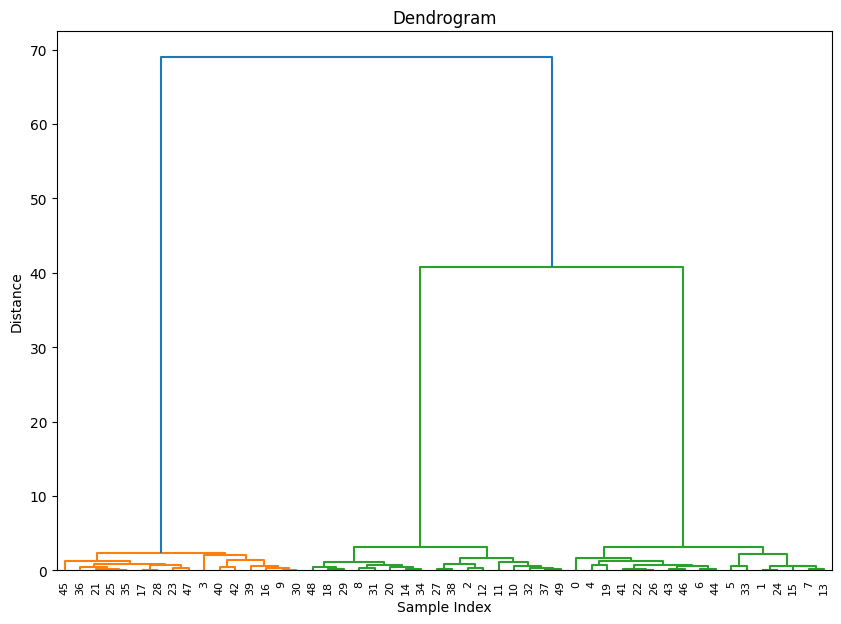

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def hierarchical_clustering(X, method='ward'):
    """
    Perform hierarchical clustering and plot a dendrogram.

    Parameters:
    - X: 2D array-like, shape (n_samples, n_features), the input data points.
    - method: The linkage method to be used (e.g., 'ward', 'single', 'complete', 'average').

    Returns:
    - Z: The linkage matrix containing the hierarchical clustering information.
    """
    # Compute the linkage matrix
    Z = linkage(X, method=method)

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title('Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

    return Z

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    from sklearn.datasets import make_blobs

    X, _ = make_blobs(n_samples=50, centers=3, cluster_std=0.60, random_state=42)

    # Perform hierarchical clustering and plot the dendrogram
    linkage_matrix = hierarchical_clustering(X, method='ward')

19. GAN Implementation for Generating Synthetic Images

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

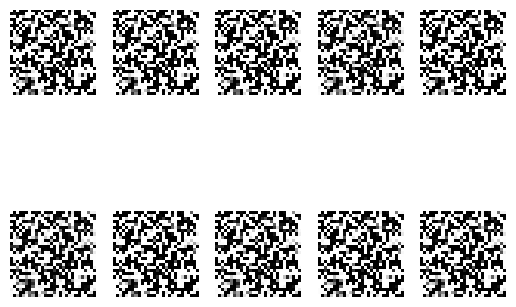

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers

def build_generator(latent_dim):
    """Build the generator model."""
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=latent_dim))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(28 * 28 * 1, activation='tanh'))  # Output shape for 28x28 images
    model.add(layers.Reshape((28, 28, 1)))  # Reshape to image format
    return model

def build_discriminator():
    """Build the discriminator model."""
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))  # Output probability
    return model

def create_gan(generator, discriminator):
    """Create the GAN model."""
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    discriminator.trainable = False  # Freeze discriminator when training GAN
    gan_input = layers.Input(shape=(latent_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = models.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

def train_gan(gan, generator, discriminator, epochs, batch_size, latent_dim):
    """Train the GAN."""
    for epoch in range(epochs):
        # Generate random noise
        noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
        generated_images = generator.predict(noise)

        # Create labels for the generated and real images
        real_images = np.random.rand(batch_size, 28, 28, 1)  # Replace with real image data
        X = np.concatenate([real_images, generated_images])
        y_dis = np.zeros(2 * batch_size)
        y_dis[:batch_size] = 0.9  # Label smoothing for real images

        # Train the discriminator
        discriminator.train_on_batch(X, y_dis)

        # Train the generator
        noise = np.random.normal(0, 1, size=[batch_size, latent_dim])
        y_gen = np.ones(batch_size)  # Generator wants the discriminator to think the images are real
        gan.train_on_batch(noise, y_gen)

        if (epoch + 1) % 100 == 0:
            print(f'Epoch: {epoch + 1}, Discriminator Loss: {discriminator.loss}, Generator Loss: {gan.loss}')

def generate_images(generator, latent_dim, n_images):
    """Generate synthetic images."""
    noise = np.random.normal(0, 1, size=[n_images, latent_dim])
    generated_images = generator.predict(noise)
    return generated_images

# Parameters
latent_dim = 100
epochs = 1000
batch_size = 32

# Build models
generator = build_generator(latent_dim)
discriminator = build_discriminator()
gan = create_gan(generator, discriminator)

# Train GAN
train_gan(gan, generator, discriminator, epochs, batch_size, latent_dim)

# Generate and visualize images
generated_images = generate_images(generator, latent_dim, 10)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.show()

20. Time Series Forecasting with ARIMA


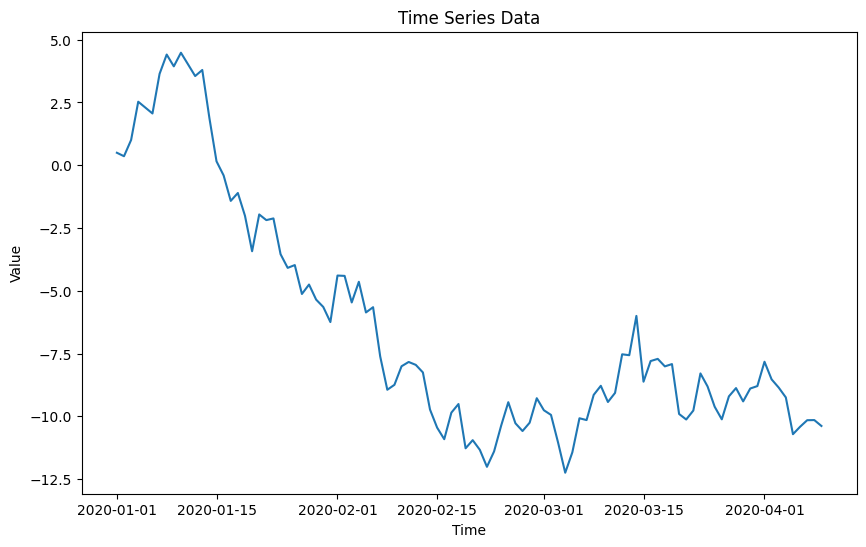

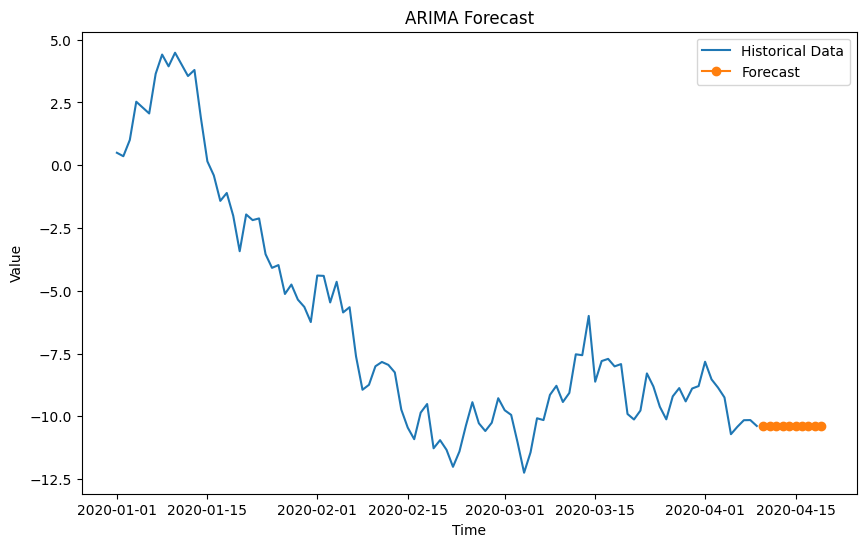

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_time_series(data, title='Time Series Data'):
    """Plot the time series data."""
    plt.figure(figsize=(10, 6))
    plt.plot(data)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

def arima_forecast(data, order, forecast_steps):
    """
    Fit an ARIMA model and perform forecasting.

    Parameters:
    - data: A pandas Series of historical data.
    - order: Tuple of (p, d, q) for ARIMA model.
    - forecast_steps: Number of steps to forecast ahead.

    Returns:
    - forecast: Forecasted values.
    """
    # Fit the ARIMA model
    model = ARIMA(data, order=order)
    model_fit = model.fit()

    # Perform forecast
    forecast = model_fit.forecast(steps=forecast_steps)

    return forecast

# Example usage
if __name__ == "__main__":
    # Generate synthetic time series data
    np.random.seed(42)
    time_index = pd.date_range(start='2020-01-01', periods=100)
    data = pd.Series(np.random.randn(100).cumsum(), index=time_index)

    # Plot the original time series data
    plot_time_series(data)

    # Define ARIMA order (p, d, q)
    order = (1, 1, 1)  # Example order, can be tuned
    forecast_steps = 10  # Number of steps to forecast

    # Perform ARIMA forecasting
    forecast = arima_forecast(data, order, forecast_steps)

    # Plot the forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data, label='Historical Data')
    forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
    plt.plot(forecast_index, forecast, label='Forecast', marker='o')
    plt.title('ARIMA Forecast')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()